In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [2]:
data=pd.read_csv('ML_Data.csv')

In [3]:
data=data.drop(['Z_jerk_mean', 'X_jerk_mean', 'total_jerk_mean', 'Y_jerk_mean','X_jerk_mean','X_jerk_min', 'X_min', 'timestamp_range', 'Y_mean', 'X_mean', 'X_max','Z_mean', 'X_jerk_max', 'X_jerk_range', 'X_range'], axis=1)

In [4]:
data.columns

Index(['label', 'X_rms', 'X_std', 'Y_min', 'Y_max', 'Y_range', 'Y_rms',
       'Y_std', 'Z_min', 'Z_max', 'Z_range', 'Z_rms', 'Z_std', 'X_jerk_rms',
       'X_jerk_std', 'Y_jerk_min', 'Y_jerk_max', 'Y_jerk_range', 'Y_jerk_rms',
       'Y_jerk_std', 'Z_jerk_min', 'Z_jerk_max', 'Z_jerk_range', 'Z_jerk_rms',
       'Z_jerk_std', 'total_jerk_min', 'total_jerk_max', 'total_jerk_range',
       'total_jerk_rms', 'total_jerk_std'],
      dtype='object')

In [5]:
data['label']= data['label'].apply(lambda x:1 if x==6 else 0)

In [6]:
data['label'].value_counts()

0    3162
1     573
Name: label, dtype: int64

In [19]:
data.dtypes

label                 int64
X_rms               float64
X_std               float64
Y_min               float64
Y_max               float64
Y_range             float64
Y_rms               float64
Y_std               float64
Z_min               float64
Z_max               float64
Z_range             float64
Z_rms               float64
Z_std               float64
X_jerk_rms          float64
X_jerk_std          float64
Y_jerk_min          float64
Y_jerk_max          float64
Y_jerk_range        float64
Y_jerk_rms          float64
Y_jerk_std          float64
Z_jerk_min          float64
Z_jerk_max          float64
Z_jerk_range        float64
Z_jerk_rms          float64
Z_jerk_std          float64
total_jerk_min      float64
total_jerk_max      float64
total_jerk_range    float64
total_jerk_rms      float64
total_jerk_std      float64
dtype: object

In [7]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [8]:
x=data.drop(['label'], axis=1)
y=data['label']

In [9]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [10]:
x_train, x_t, y_train, y_t= train_test_split(x,y,test_size=0.3, random_state=42)
x_train.shape, x_t.shape

((2614, 29), (1121, 29))

In [11]:
x_val, x_test, y_val, y_test= train_test_split(x_t, y_t, test_size=0.15, random_state=42)
x_val.shape, x_test.shape

((952, 29), (169, 29))

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD

2024-11-22 15:23:42.489380: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-22 15:23:42.562976: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-22 15:23:42.884048: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-22 15:23:42.884070: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-22 15:23:42.885316: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [13]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [14]:
model = Sequential([
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [15]:
initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate,      # Starting learning rate
    decay_steps=1000,         # How often to decay the learning rate
    decay_rate=0.96,            # The decay rate
    staircase=True              # Apply decay in discrete steps
)

# early_stopping = EarlyStopping(monitor='val_loss', patience=70, restore_best_weights=True)

In [16]:
# model.compile(optimizer=SGD(learning_rate=lr_schedule, 
#                             momentum=0.97, 
#                             nesterov=True),  # Enable Nesterov momentum
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

In [20]:
model.compile(optimizer=Adam(), 
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [21]:
history = model.fit(x_train, y_train,
                                epochs=400,
                                batch_size=64,
                                validation_data= (x_val, y_val),
                                verbose=2)

Epoch 1/400
41/41 - 0s - loss: 0.5434 - accuracy: 0.8317 - val_loss: 0.4129 - val_accuracy: 0.8697 - 364ms/epoch - 9ms/step
Epoch 2/400
41/41 - 0s - loss: 0.3583 - accuracy: 0.8929 - val_loss: 0.3283 - val_accuracy: 0.8939 - 46ms/epoch - 1ms/step
Epoch 3/400
41/41 - 0s - loss: 0.2949 - accuracy: 0.9101 - val_loss: 0.2887 - val_accuracy: 0.9055 - 44ms/epoch - 1ms/step
Epoch 4/400
41/41 - 0s - loss: 0.2582 - accuracy: 0.9239 - val_loss: 0.2627 - val_accuracy: 0.9076 - 43ms/epoch - 1ms/step
Epoch 5/400
41/41 - 0s - loss: 0.2329 - accuracy: 0.9269 - val_loss: 0.2443 - val_accuracy: 0.9107 - 43ms/epoch - 1ms/step
Epoch 6/400
41/41 - 0s - loss: 0.2138 - accuracy: 0.9319 - val_loss: 0.2293 - val_accuracy: 0.9191 - 42ms/epoch - 1ms/step
Epoch 7/400
41/41 - 0s - loss: 0.1984 - accuracy: 0.9373 - val_loss: 0.2164 - val_accuracy: 0.9202 - 42ms/epoch - 1ms/step
Epoch 8/400
41/41 - 0s - loss: 0.1853 - accuracy: 0.9411 - val_loss: 0.2052 - val_accuracy: 0.9286 - 42ms/epoch - 1ms/step
Epoch 9/400
41/

Epoch 68/400
41/41 - 0s - loss: 0.0512 - accuracy: 0.9836 - val_loss: 0.0744 - val_accuracy: 0.9727 - 43ms/epoch - 1ms/step
Epoch 69/400
41/41 - 0s - loss: 0.0506 - accuracy: 0.9847 - val_loss: 0.0741 - val_accuracy: 0.9727 - 43ms/epoch - 1ms/step
Epoch 70/400
41/41 - 0s - loss: 0.0502 - accuracy: 0.9843 - val_loss: 0.0734 - val_accuracy: 0.9737 - 41ms/epoch - 1ms/step
Epoch 71/400
41/41 - 0s - loss: 0.0499 - accuracy: 0.9843 - val_loss: 0.0725 - val_accuracy: 0.9737 - 43ms/epoch - 1ms/step
Epoch 72/400
41/41 - 0s - loss: 0.0494 - accuracy: 0.9851 - val_loss: 0.0727 - val_accuracy: 0.9737 - 41ms/epoch - 1ms/step
Epoch 73/400
41/41 - 0s - loss: 0.0494 - accuracy: 0.9839 - val_loss: 0.0722 - val_accuracy: 0.9748 - 44ms/epoch - 1ms/step
Epoch 74/400
41/41 - 0s - loss: 0.0488 - accuracy: 0.9851 - val_loss: 0.0715 - val_accuracy: 0.9737 - 43ms/epoch - 1ms/step
Epoch 75/400
41/41 - 0s - loss: 0.0489 - accuracy: 0.9839 - val_loss: 0.0716 - val_accuracy: 0.9727 - 43ms/epoch - 1ms/step
Epoch 76

Epoch 134/400
41/41 - 0s - loss: 0.0349 - accuracy: 0.9874 - val_loss: 0.0560 - val_accuracy: 0.9758 - 43ms/epoch - 1ms/step
Epoch 135/400
41/41 - 0s - loss: 0.0345 - accuracy: 0.9874 - val_loss: 0.0569 - val_accuracy: 0.9758 - 42ms/epoch - 1ms/step
Epoch 136/400
41/41 - 0s - loss: 0.0347 - accuracy: 0.9866 - val_loss: 0.0563 - val_accuracy: 0.9758 - 44ms/epoch - 1ms/step
Epoch 137/400
41/41 - 0s - loss: 0.0344 - accuracy: 0.9874 - val_loss: 0.0562 - val_accuracy: 0.9769 - 43ms/epoch - 1ms/step
Epoch 138/400
41/41 - 0s - loss: 0.0344 - accuracy: 0.9874 - val_loss: 0.0561 - val_accuracy: 0.9758 - 42ms/epoch - 1ms/step
Epoch 139/400
41/41 - 0s - loss: 0.0341 - accuracy: 0.9874 - val_loss: 0.0556 - val_accuracy: 0.9769 - 42ms/epoch - 1ms/step
Epoch 140/400
41/41 - 0s - loss: 0.0339 - accuracy: 0.9878 - val_loss: 0.0559 - val_accuracy: 0.9769 - 44ms/epoch - 1ms/step
Epoch 141/400
41/41 - 0s - loss: 0.0341 - accuracy: 0.9878 - val_loss: 0.0581 - val_accuracy: 0.9748 - 41ms/epoch - 1ms/step


Epoch 200/400
41/41 - 0s - loss: 0.0278 - accuracy: 0.9893 - val_loss: 0.0577 - val_accuracy: 0.9790 - 43ms/epoch - 1ms/step
Epoch 201/400
41/41 - 0s - loss: 0.0283 - accuracy: 0.9897 - val_loss: 0.0579 - val_accuracy: 0.9790 - 43ms/epoch - 1ms/step
Epoch 202/400
41/41 - 0s - loss: 0.0281 - accuracy: 0.9878 - val_loss: 0.0571 - val_accuracy: 0.9790 - 43ms/epoch - 1ms/step
Epoch 203/400
41/41 - 0s - loss: 0.0282 - accuracy: 0.9893 - val_loss: 0.0578 - val_accuracy: 0.9790 - 42ms/epoch - 1ms/step
Epoch 204/400
41/41 - 0s - loss: 0.0279 - accuracy: 0.9904 - val_loss: 0.0583 - val_accuracy: 0.9790 - 44ms/epoch - 1ms/step
Epoch 205/400
41/41 - 0s - loss: 0.0277 - accuracy: 0.9897 - val_loss: 0.0574 - val_accuracy: 0.9790 - 44ms/epoch - 1ms/step
Epoch 206/400
41/41 - 0s - loss: 0.0277 - accuracy: 0.9897 - val_loss: 0.0580 - val_accuracy: 0.9790 - 43ms/epoch - 1ms/step
Epoch 207/400
41/41 - 0s - loss: 0.0276 - accuracy: 0.9893 - val_loss: 0.0570 - val_accuracy: 0.9800 - 43ms/epoch - 1ms/step


Epoch 266/400
41/41 - 0s - loss: 0.0240 - accuracy: 0.9920 - val_loss: 0.0583 - val_accuracy: 0.9811 - 42ms/epoch - 1ms/step
Epoch 267/400
41/41 - 0s - loss: 0.0242 - accuracy: 0.9912 - val_loss: 0.0603 - val_accuracy: 0.9800 - 43ms/epoch - 1ms/step
Epoch 268/400
41/41 - 0s - loss: 0.0240 - accuracy: 0.9920 - val_loss: 0.0587 - val_accuracy: 0.9811 - 43ms/epoch - 1ms/step
Epoch 269/400
41/41 - 0s - loss: 0.0242 - accuracy: 0.9916 - val_loss: 0.0591 - val_accuracy: 0.9811 - 42ms/epoch - 1ms/step
Epoch 270/400
41/41 - 0s - loss: 0.0239 - accuracy: 0.9916 - val_loss: 0.0594 - val_accuracy: 0.9811 - 43ms/epoch - 1ms/step
Epoch 271/400
41/41 - 0s - loss: 0.0238 - accuracy: 0.9908 - val_loss: 0.0589 - val_accuracy: 0.9800 - 41ms/epoch - 1ms/step
Epoch 272/400
41/41 - 0s - loss: 0.0237 - accuracy: 0.9908 - val_loss: 0.0589 - val_accuracy: 0.9811 - 45ms/epoch - 1ms/step
Epoch 273/400
41/41 - 0s - loss: 0.0239 - accuracy: 0.9916 - val_loss: 0.0589 - val_accuracy: 0.9811 - 42ms/epoch - 1ms/step


Epoch 332/400
41/41 - 0s - loss: 0.0208 - accuracy: 0.9920 - val_loss: 0.0617 - val_accuracy: 0.9811 - 44ms/epoch - 1ms/step
Epoch 333/400
41/41 - 0s - loss: 0.0211 - accuracy: 0.9920 - val_loss: 0.0630 - val_accuracy: 0.9800 - 43ms/epoch - 1ms/step
Epoch 334/400
41/41 - 0s - loss: 0.0208 - accuracy: 0.9923 - val_loss: 0.0631 - val_accuracy: 0.9800 - 44ms/epoch - 1ms/step
Epoch 335/400
41/41 - 0s - loss: 0.0206 - accuracy: 0.9939 - val_loss: 0.0627 - val_accuracy: 0.9800 - 41ms/epoch - 1ms/step
Epoch 336/400
41/41 - 0s - loss: 0.0213 - accuracy: 0.9916 - val_loss: 0.0625 - val_accuracy: 0.9811 - 42ms/epoch - 1ms/step
Epoch 337/400
41/41 - 0s - loss: 0.0212 - accuracy: 0.9927 - val_loss: 0.0644 - val_accuracy: 0.9790 - 44ms/epoch - 1ms/step
Epoch 338/400
41/41 - 0s - loss: 0.0210 - accuracy: 0.9916 - val_loss: 0.0646 - val_accuracy: 0.9790 - 42ms/epoch - 1ms/step
Epoch 339/400
41/41 - 0s - loss: 0.0213 - accuracy: 0.9923 - val_loss: 0.0629 - val_accuracy: 0.9800 - 42ms/epoch - 1ms/step


Epoch 398/400
41/41 - 0s - loss: 0.0188 - accuracy: 0.9946 - val_loss: 0.0679 - val_accuracy: 0.9800 - 42ms/epoch - 1ms/step
Epoch 399/400
41/41 - 0s - loss: 0.0185 - accuracy: 0.9935 - val_loss: 0.0681 - val_accuracy: 0.9790 - 43ms/epoch - 1ms/step
Epoch 400/400
41/41 - 0s - loss: 0.0192 - accuracy: 0.9935 - val_loss: 0.0682 - val_accuracy: 0.9790 - 43ms/epoch - 1ms/step


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 240       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 249 (996.00 Byte)
Trainable params: 249 (996.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


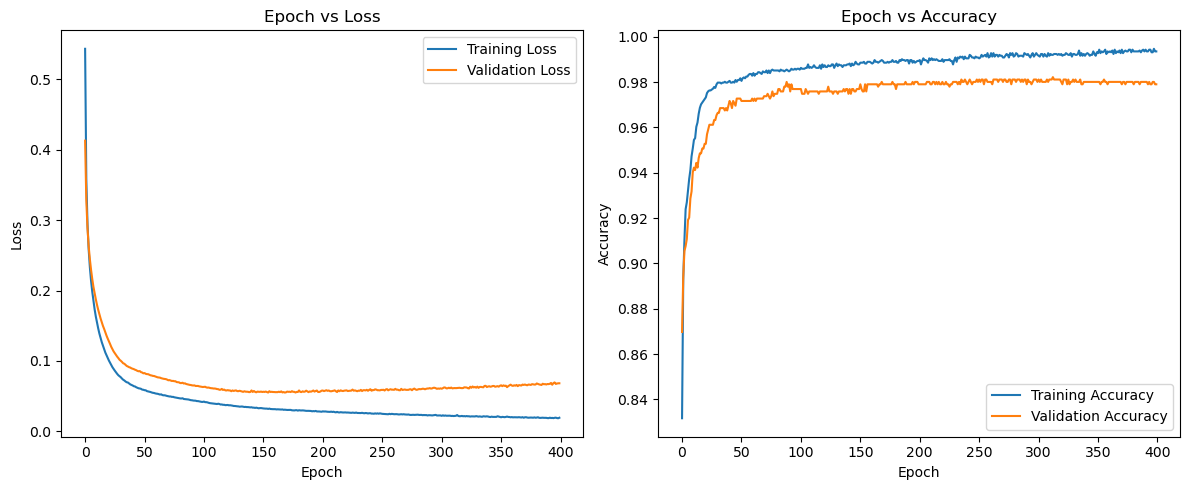

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 99.43%
Test Accuracy: 98.82%


6/6 [==============================] - 0s 852us/step


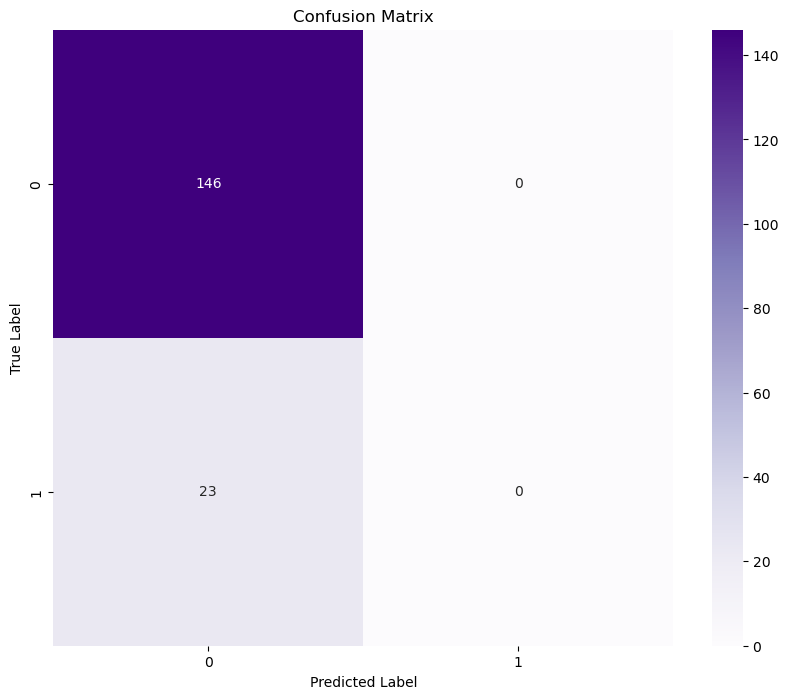

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       146
           1       0.00      0.00      0.00        23

    accuracy                           0.86       169
   macro avg       0.43      0.50      0.46       169
weighted avg       0.75      0.86      0.80       169



/home/ettexham/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ettexham/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ettexham/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

if len(y_test.shape) == 1 or y_test.shape[1] == 1:
    y_true = y_test  
else:
    y_true = np.argmax(y_test, axis=1)  


conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(len(np.unique(y_true)))])
print("Classification Report:")
print(class_report)


In [26]:
model.save('model_5.h5')

/home/ettexham/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
